In [1]:
import os
import torch
import sys
sys.path.append('../../')

In [2]:
def set_num_threads(nt):
    "Get numpy (and others) to use `nt` threads"
    try: import mkl; mkl.set_num_threads(nt)
    except: pass
    torch.set_num_threads(nt)
    os.environ['IPC_ENABLE']='1'
    for o in ['OPENBLAS_NUM_THREADS','NUMEXPR_NUM_THREADS','OMP_NUM_THREADS','MKL_NUM_THREADS']:
        os.environ[o] = str(nt)

In [3]:
set_num_threads(8)

In [4]:
import libtiff
import imageio
import PIL
import numpy as np
import matplotlib.pyplot as plt
import fastai as fai
import fastai.vision as faiv
import fastai.callbacks as faic
import data.utils
import data.svd
from data import load

In [5]:
# Modify accordingly
path = faiv.Path('/data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/')

# dataset_name = 'real-world_SEM'

lr_name = f'training/trainsets/crappified/'
lr_path = path/f'{lr_name}'
# create list of crappified image filenames, sorted alphabetically
lr_files = sorted(list(lr_path.glob('*.tif')))

# hr_name = f'training/trainsets/hr/'
# hr_path = path/f'{hr_name}'
# hr_files = sorted(list(hr_path.glob('*.tif')))

print('Processing '+str(len(lr_files))+' files...')

Processing 99997 files...


In [6]:
# Set size for visualizations
fig_size = plt.rcParams["figure.figsize"]  # Get current size
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 24
plt.rcParams["figure.figsize"] = fig_size
print("Updated size:", fig_size)

Current size: [6.0, 4.0]
Updated size: [30, 24]


In [7]:
bs = 8  # batch size
size = 512  # image size
data_pth = faiv.Path('/data/alaa/Dropbox (BPHO)/BPHO Staff/USF')  # path to dataset
lr_dir = f'EM/training/trainsets/crappified/'  # input images
hr_dir = f'EM/training/trainsets/hr/'  # target images
model_path = data_pth/f'EM/models/'  # path to saved models

In [8]:
# Load dataset in a databunch object 
db = load.get_data(data_pth, lr_dir, hr_dir, bs, in_sz=size, out_sz=size, max_zoom=3)

/data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/crappified


In [9]:
from model.metrics import psnr, ssim
metrics = [faiv.F.mse_loss, psnr, ssim]

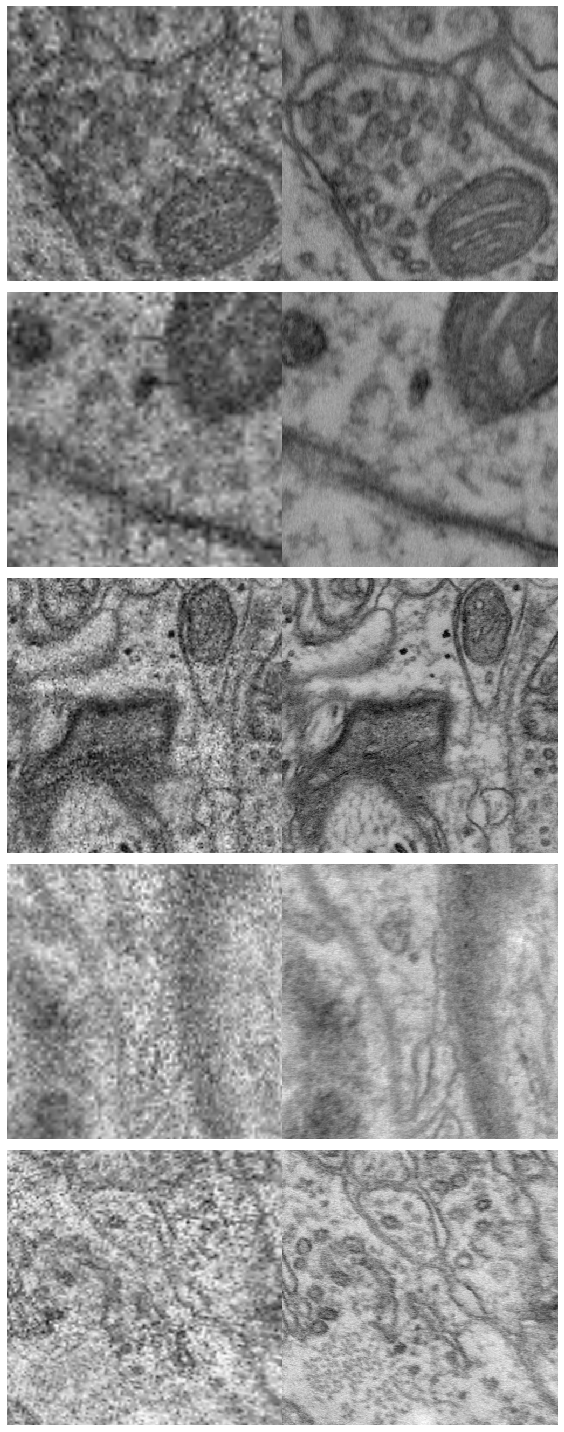

In [10]:
db.show_batch()

In [11]:
arch = faiv.models.resnet34
wd = 1e-3
learn = faiv.unet_learner(db, arch, wd=wd, 
                     #loss_func=feat_loss,
                     loss_func=faiv.F.mse_loss,
                     metrics=metrics, 
                     #callback_fns=LossMetrics, 
                     blur=True, norm_type=faiv.NormType.Weight, model_dir=model_path)
faiv.gc.collect()

21185

In [12]:
learn = learn.load('emsynth_005_unet.5')

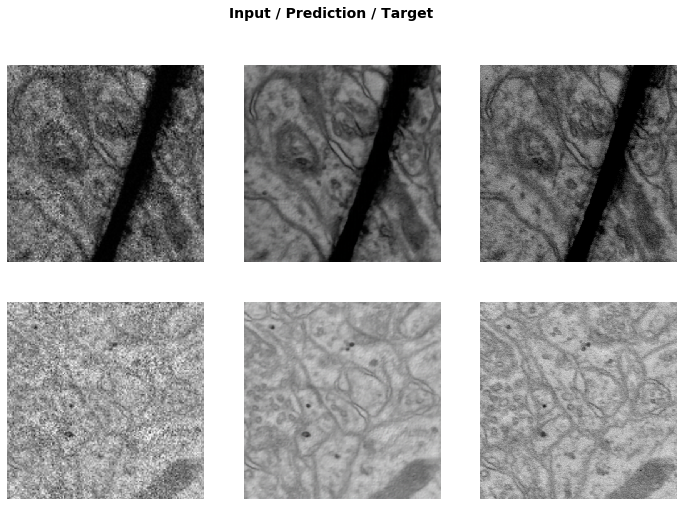

In [18]:
learn.show_results(rows=2)

In [35]:
learn.validate()

[0.055267815, tensor(0.0553), tensor(12.5944), tensor(0.2876)]

In [22]:
learn.path = model_path

In [24]:
# export learner for inference
learn.export()

In [25]:
learn = faiv.load_learner(learn.path, test=faiv.ImageList.from_folder(data_pth/lr_dir), tfm_y=False)

In [26]:
num = len(learn.data.test_ds)
print(num)

99997


In [27]:
learn.data.test_ds

LabelList (99997 items)
x: ImageImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: EmptyLabelList
,,,,
Path: /data/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/models

In [28]:
learn.data.batch_size

64

In [30]:
learn.get_preds(DatasetType.Test)

NameError: name 'DatasetType' is not defined

In [57]:
for i in range(3):
  filename = str(learn.data.test_ds.items[i]).split('/')[-1]
  t = learn.predict(learn.data.test_ds[i][0])

In [82]:
mean = faiv.Tensor(faiv.imagenet_stats[0])
std = faiv.Tensor(faiv.imagenet_stats[1])

In [ ]:
f

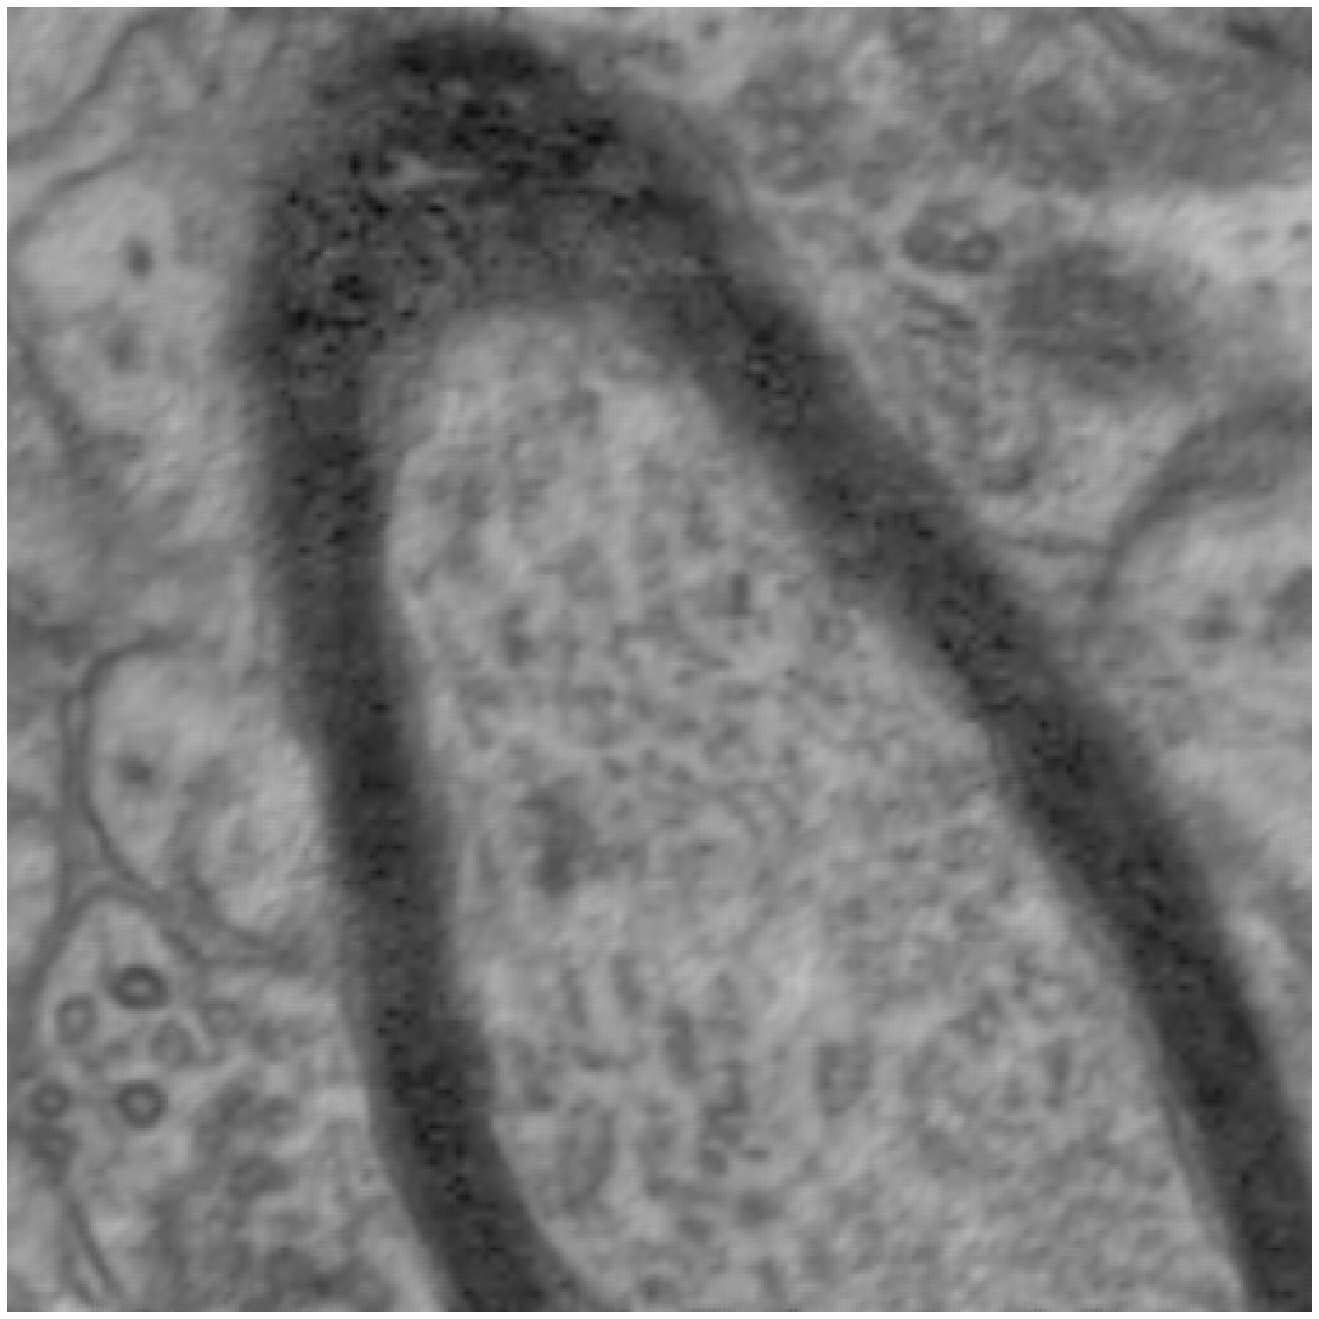

In [93]:
faiv.show_image(t[1], figsize=(30,24))

In [94]:
t[1]

tensor([[[0.5425, 0.5354, 0.5230,  ..., 0.4510, 0.4510, 0.4634],
         [0.5516, 0.5440, 0.5466,  ..., 0.4380, 0.4450, 0.4442],
         [0.5588, 0.5527, 0.5457,  ..., 0.4329, 0.4356, 0.4342],
         ...,
         [0.4703, 0.4694, 0.4708,  ..., 0.2282, 0.2214, 0.2313],
         [0.4560, 0.4510, 0.4602,  ..., 0.2150, 0.2181, 0.2399],
         [0.4250, 0.4310, 0.4521,  ..., 0.1978, 0.2052, 0.2012]],

        [[0.5454, 0.5360, 0.5270,  ..., 0.4438, 0.4548, 0.4621],
         [0.5559, 0.5491, 0.5475,  ..., 0.4402, 0.4444, 0.4484],
         [0.5600, 0.5483, 0.5459,  ..., 0.4321, 0.4302, 0.4336],
         ...,
         [0.4753, 0.4640, 0.4727,  ..., 0.2260, 0.2223, 0.2376],
         [0.4452, 0.4587, 0.4592,  ..., 0.2127, 0.2259, 0.2259],
         [0.4214, 0.4273, 0.4482,  ..., 0.1965, 0.2039, 0.2096]],

        [[0.5444, 0.5329, 0.5295,  ..., 0.4470, 0.4548, 0.4633],
         [0.5523, 0.5446, 0.5459,  ..., 0.4387, 0.4412, 0.4445],
         [0.5573, 0.5529, 0.5461,  ..., 0.4361, 0.4354, 0.

In [86]:
filename

'EM_train_lr_93697.tif'

In [88]:
l = data.utils.load_img(lr_files[93696])

In [89]:
l

array([[[ 61., 162., 184., 123., ...,  88., 140., 210., 174.],
        [ 94., 131., 157., 128., ..., 141., 157., 103., 139.],
        [181., 161., 147.,  57., ..., 124., 157., 100., 133.],
        [109., 181., 114., 146., ..., 148.,  51., 122., 107.],
        ...,
        [134., 224., 166., 150., ...,  91.,  58., 123., 142.],
        [198., 138., 131., 216., ..., 116., 175., 164., 107.],
        [253., 183., 116.,  89., ...,  70., 115., 116., 136.],
        [129., 196., 128., 163., ..., 155., 131.,  86., 134.]]], dtype=float32)

In [71]:
faiv.denormalize(t[1], faiv.Tensor(faiv.imagenet_stats[0]), faiv.Tensor(faiv.imagenet_stats[1]))

tensor([[[0.6092, 0.6076, 0.6048,  ..., 0.5883, 0.5883, 0.5911],
         [0.6113, 0.6096, 0.6102,  ..., 0.5853, 0.5869, 0.5867],
         [0.6130, 0.6116, 0.6100,  ..., 0.5841, 0.5848, 0.5844],
         ...,
         [0.5927, 0.5925, 0.5928,  ..., 0.5373, 0.5357, 0.5380],
         [0.5894, 0.5883, 0.5904,  ..., 0.5342, 0.5349, 0.5399],
         [0.5823, 0.5837, 0.5885,  ..., 0.5303, 0.5320, 0.5311]],

        [[0.5782, 0.5761, 0.5741,  ..., 0.5554, 0.5579, 0.5595],
         [0.5805, 0.5790, 0.5786,  ..., 0.5546, 0.5556, 0.5564],
         [0.5814, 0.5788, 0.5783,  ..., 0.5528, 0.5524, 0.5531],
         ...,
         [0.5625, 0.5599, 0.5619,  ..., 0.5066, 0.5058, 0.5092],
         [0.5557, 0.5588, 0.5589,  ..., 0.5036, 0.5066, 0.5066],
         [0.5504, 0.5517, 0.5564,  ..., 0.5000, 0.5017, 0.5030]],

        [[0.5285, 0.5259, 0.5251,  ..., 0.5066, 0.5083, 0.5102],
         [0.5303, 0.5285, 0.5288,  ..., 0.5047, 0.5053, 0.5060],
         [0.5314, 0.5304, 0.5289,  ..., 0.5041, 0.5040, 0.

In [69]:
faiv.imagenet_stats[1]

[0.229, 0.224, 0.225]

In [90]:
faiv.imagenet_stats

([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])